<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto/blob/main/Crimenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

from itertools import cycle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LogNorm
import seaborn as sns
import pydotplus
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from IPython.display import Image  

En la siguiente base de datos se expresan la totalidad de crimenes y la distribución de los mismos segun su porcentaje.
En varios estudios se determina una relación entre el uso indebido de drogas y otros delitos penales, incluidos los delitos violentos. Los estudios de casos concretos de delincuentes que han cometido delitos violentos como los de homicidio y robo indican que el uso indebido de drogas suele ser un factor crítico.En este caso vamos a predecir como sera el comportamiento de los delitos de sustancias ilísitas segun el resto de crímenes.

In [3]:
url = 'https://github.com/herrmilt/ADwithPythonCourse/blob/main/actividades/data/crime_2019.csv?raw=true'
df = pd.read_csv(url)
df

,LSOA Code,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person,Total_crime
0,E01000006,0.000000,0.111111,0.000000,0.037037,0.000000,0.000000,0.111111,0.037037,0.222222,0.481481,27
1,E01000007,0.042105,0.052632,0.231579,0.031579,0.000000,0.063158,0.042105,0.315789,0.052632,0.168421,95
2,E01000008,0.103448,0.034483,0.068966,0.000000,0.000000,0.137931,0.000000,0.310345,0.172414,0.172414,29
3,E01000009,0.042553,0.042553,0.085106,0.000000,0.000000,0.042553,0.063830,0.319149,0.106383,0.297872,47
4,E01000010,0.036885,0.065574,0.061475,0.004098,0.008197,0.057377,0.045082,0.430328,0.077869,0.213115,244
...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01033742,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.428571,7
4825,E01033743,0.058824,0.029412,0.000000,0.000000,0.014706,0.058824,0.000000,0.544118,0.073529,0.220588,68
4826,E01033744,0.105263,0.105263,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.210526,0.421053,19
4827,E01033745,0.103448,0.103448,0.068966,0.000000,0.000000,0.034483,0.034483,0.034483,0.241379,0.379310,29


Burglary: este tipo de robo se comete en casas o lugares de trabajo

Theft: es un robo sin violencia

Robbery: normalmente robo con violencia y amenazas (en bancos, por ejemplo)


Mugging: este término hace referencia a un atraco, generalmente en la calle para robar dinero a personas

In [ ]:
df.describe()

,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person,Total_crime
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.072337,0.126501,0.046510,0.012626,0.006931,0.054174,0.041675,0.165015,0.197098,0.277133,30.643197
std,0.073402,0.111947,0.061361,0.030575,0.020445,0.059799,0.058512,0.145755,0.140545,0.143355,55.785340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060606,0.093750,0.173913,14.000000
50%,0.058824,0.100000,0.027027,0.000000,0.000000,0.044521,0.019737,0.131579,0.170213,0.272727,20.000000
75%,0.105263,0.176471,0.073394,0.002439,0.000000,0.086207,0.064516,0.240741,0.272727,0.363636,32.000000
max,0.750000,1.000000,0.500000,0.600000,0.333333,0.500000,0.500000,0.833333,1.000000,1.000000,1753.000000


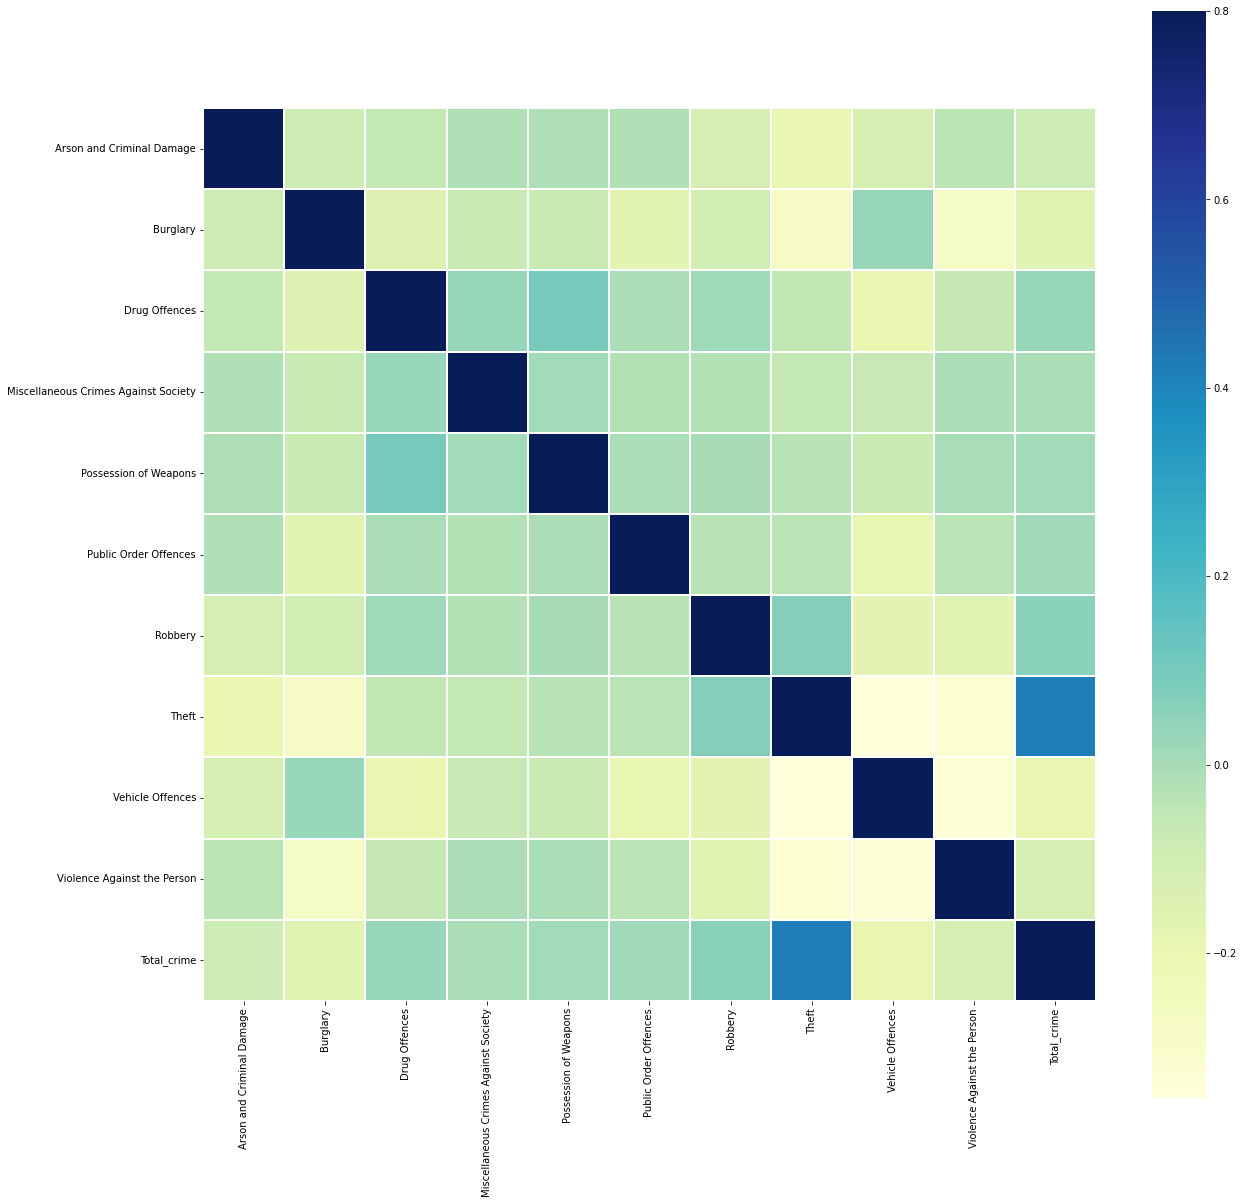

In [ ]:
corr=df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu');

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   LSOA Code                             4829 non-null   object 
 1   Arson and Criminal Damage             4829 non-null   float64
 2   Burglary                              4829 non-null   float64
 3   Drug Offences                         4829 non-null   float64
 4   Miscellaneous Crimes Against Society  4829 non-null   float64
 5   Possession of Weapons                 4829 non-null   float64
 6   Public Order Offences                 4829 non-null   float64
 7   Robbery                               4829 non-null   float64
 8   Theft                                 4829 non-null   float64
 9   Vehicle Offences                      4829 non-null   float64
 10  Violence Against the Person           4829 non-null   float64
 11  Total_crime      

<ipython-input-10-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<Axes: xlabel='Violence Against the Person', ylabel='Drug Offences'>

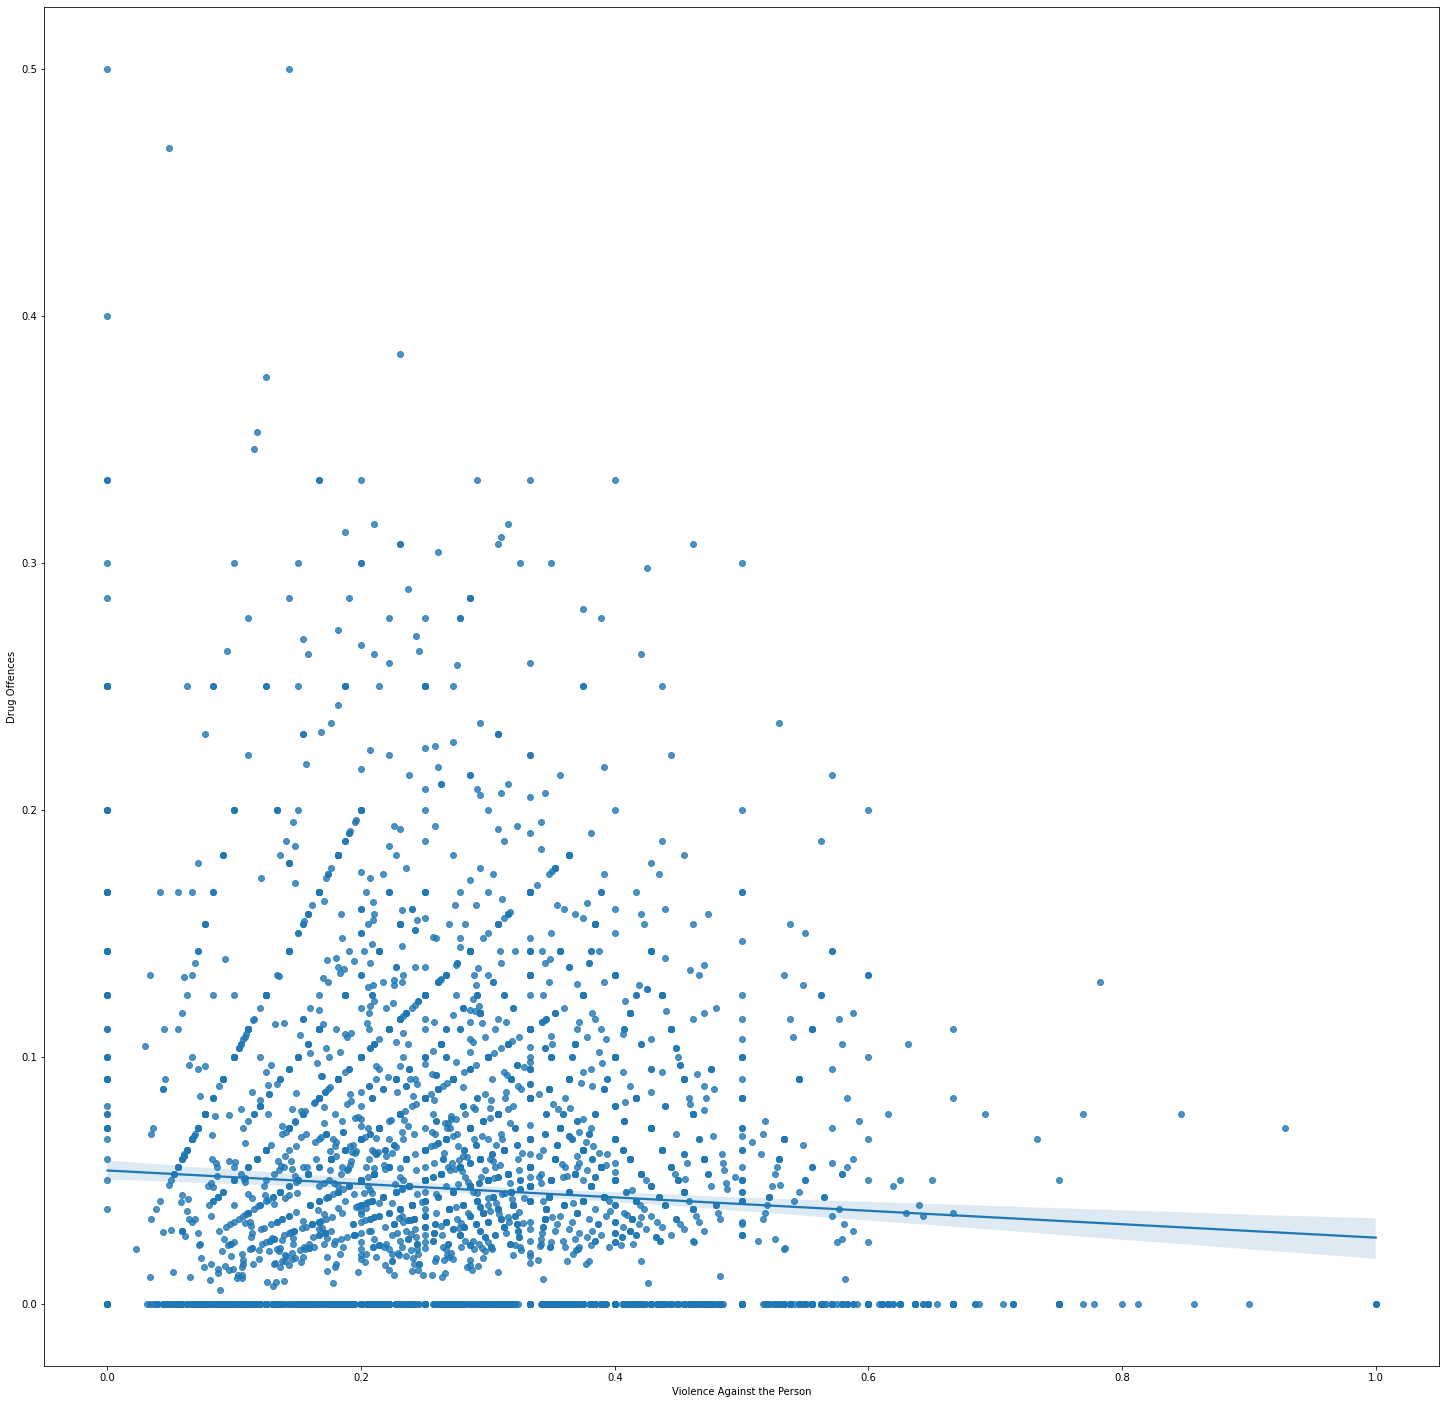

In [6]:
import seaborn as sns
sns.regplot(y=df["Drug Offences"],x=df["Violence Against the Person"])

Cualquiera podria pensar que al contrario, que a mayor poseción de drogas menos crimenes, pero dada la prevalencia de la mayoría de datos que indican lo contrario es necesario estudiar más a fondo.

<Axes: xlabel='Possession of Weapons', ylabel='Drug Offences'>

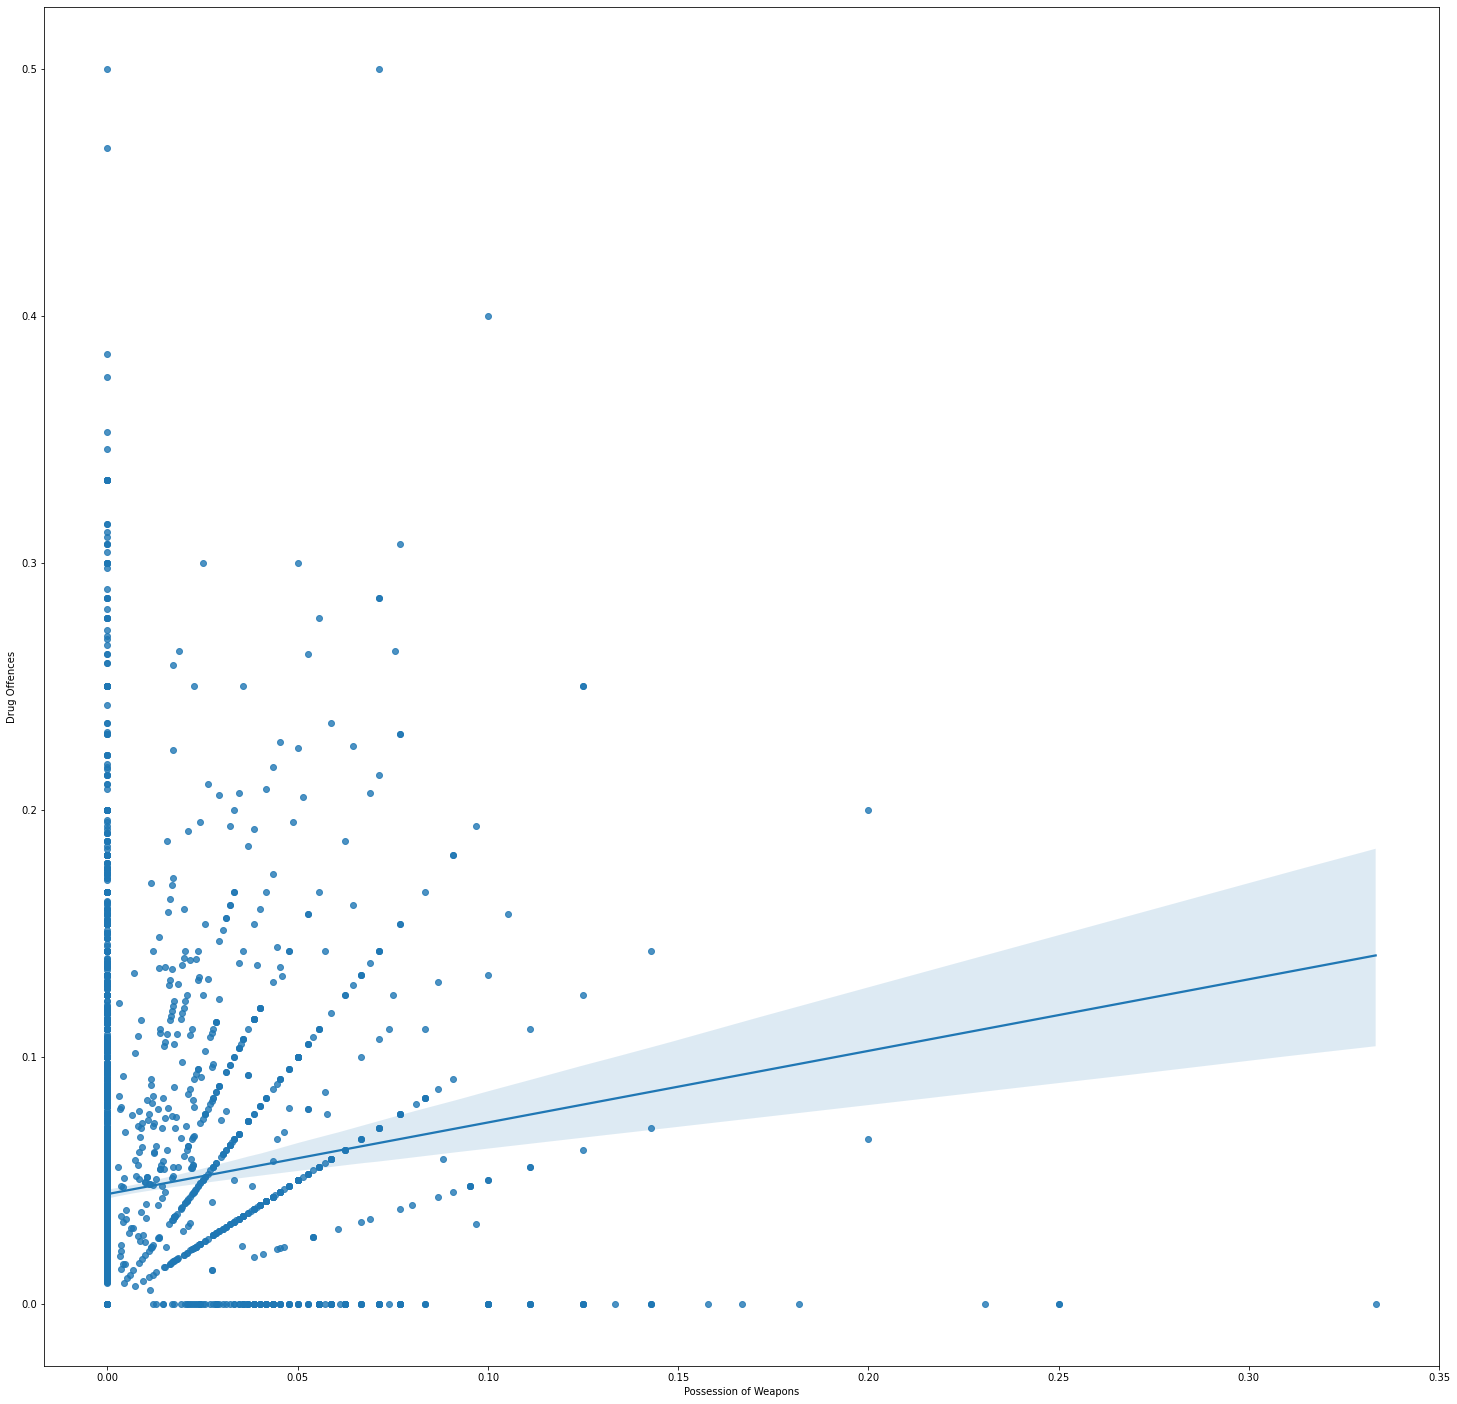

In [5]:
import seaborn as sns
sns.regplot(y=df["Drug Offences"],x=df["Possession of Weapons"])

<Axes: xlabel='Theft', ylabel='Drug Offences'>

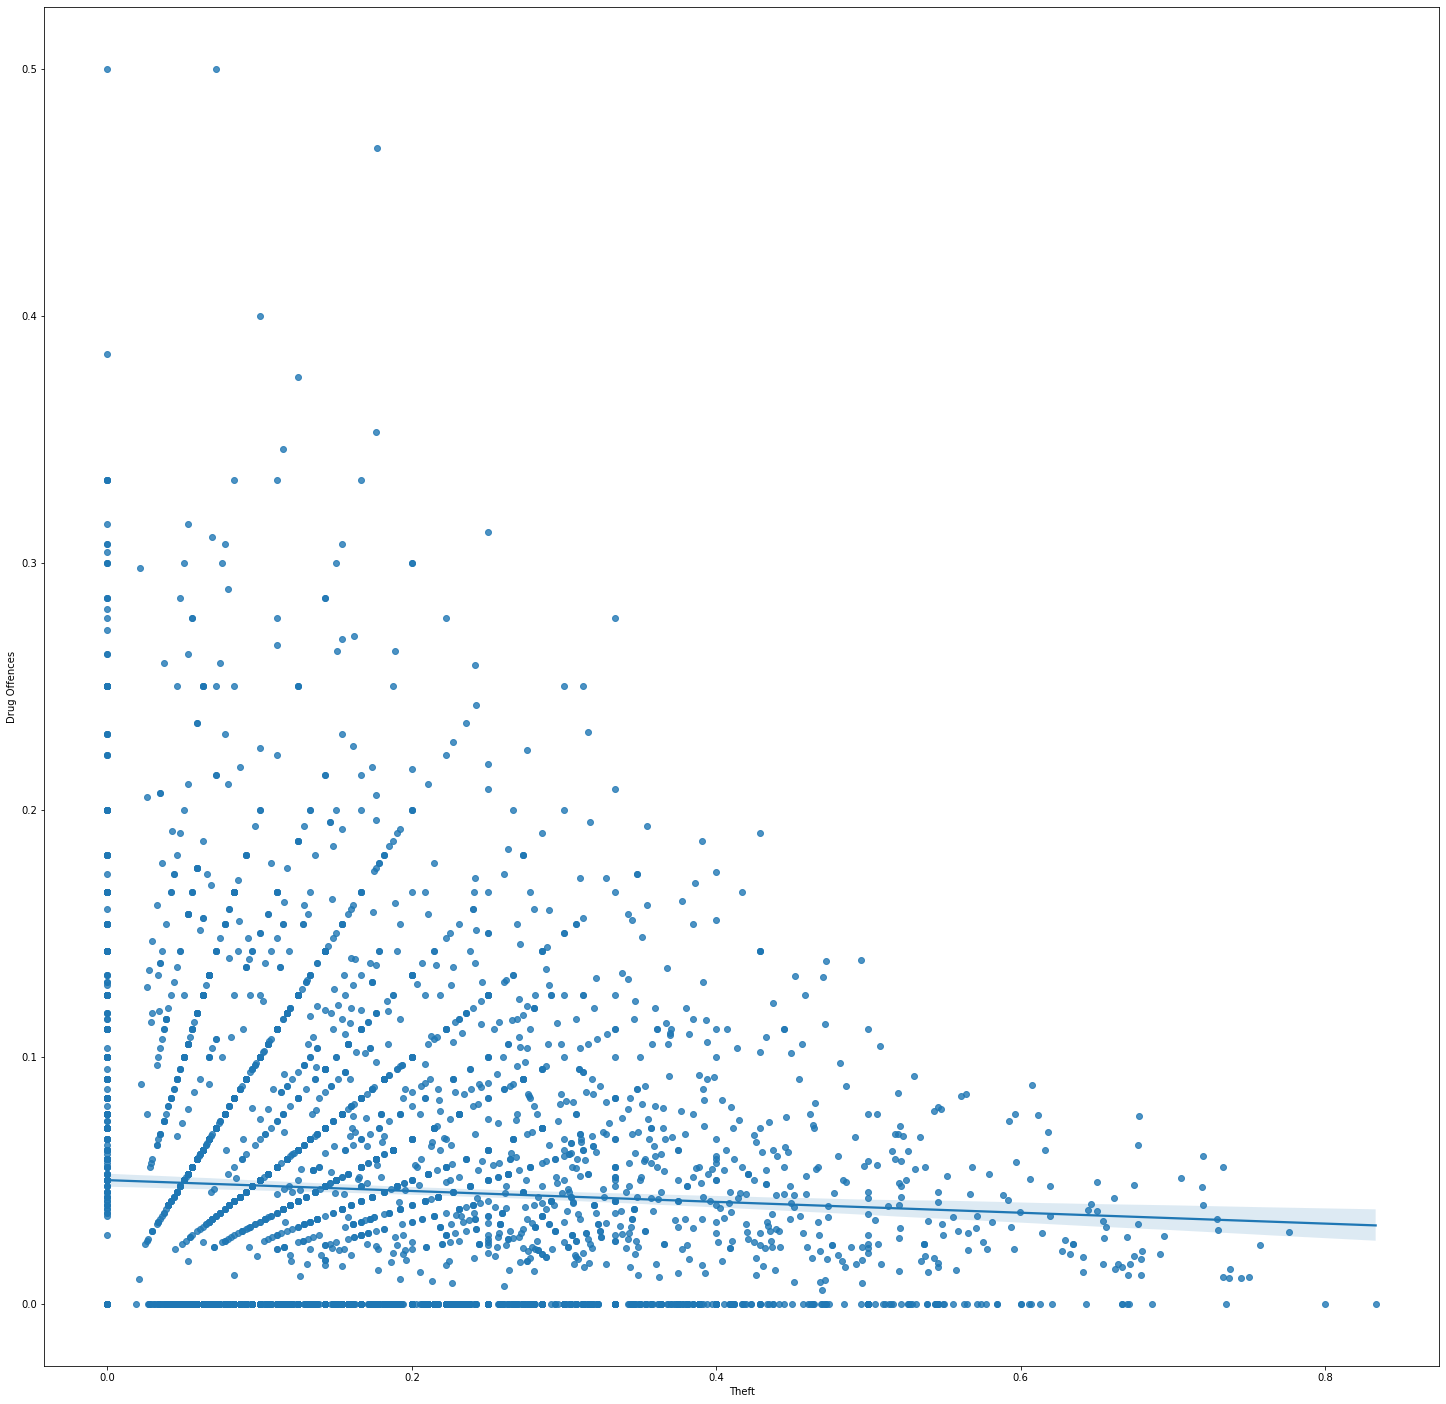

In [7]:
import seaborn as sns
sns.regplot(y=df["Drug Offences"],x=df["Theft"])

<Axes: xlabel='Miscellaneous Crimes Against Society', ylabel='Drug Offences'>

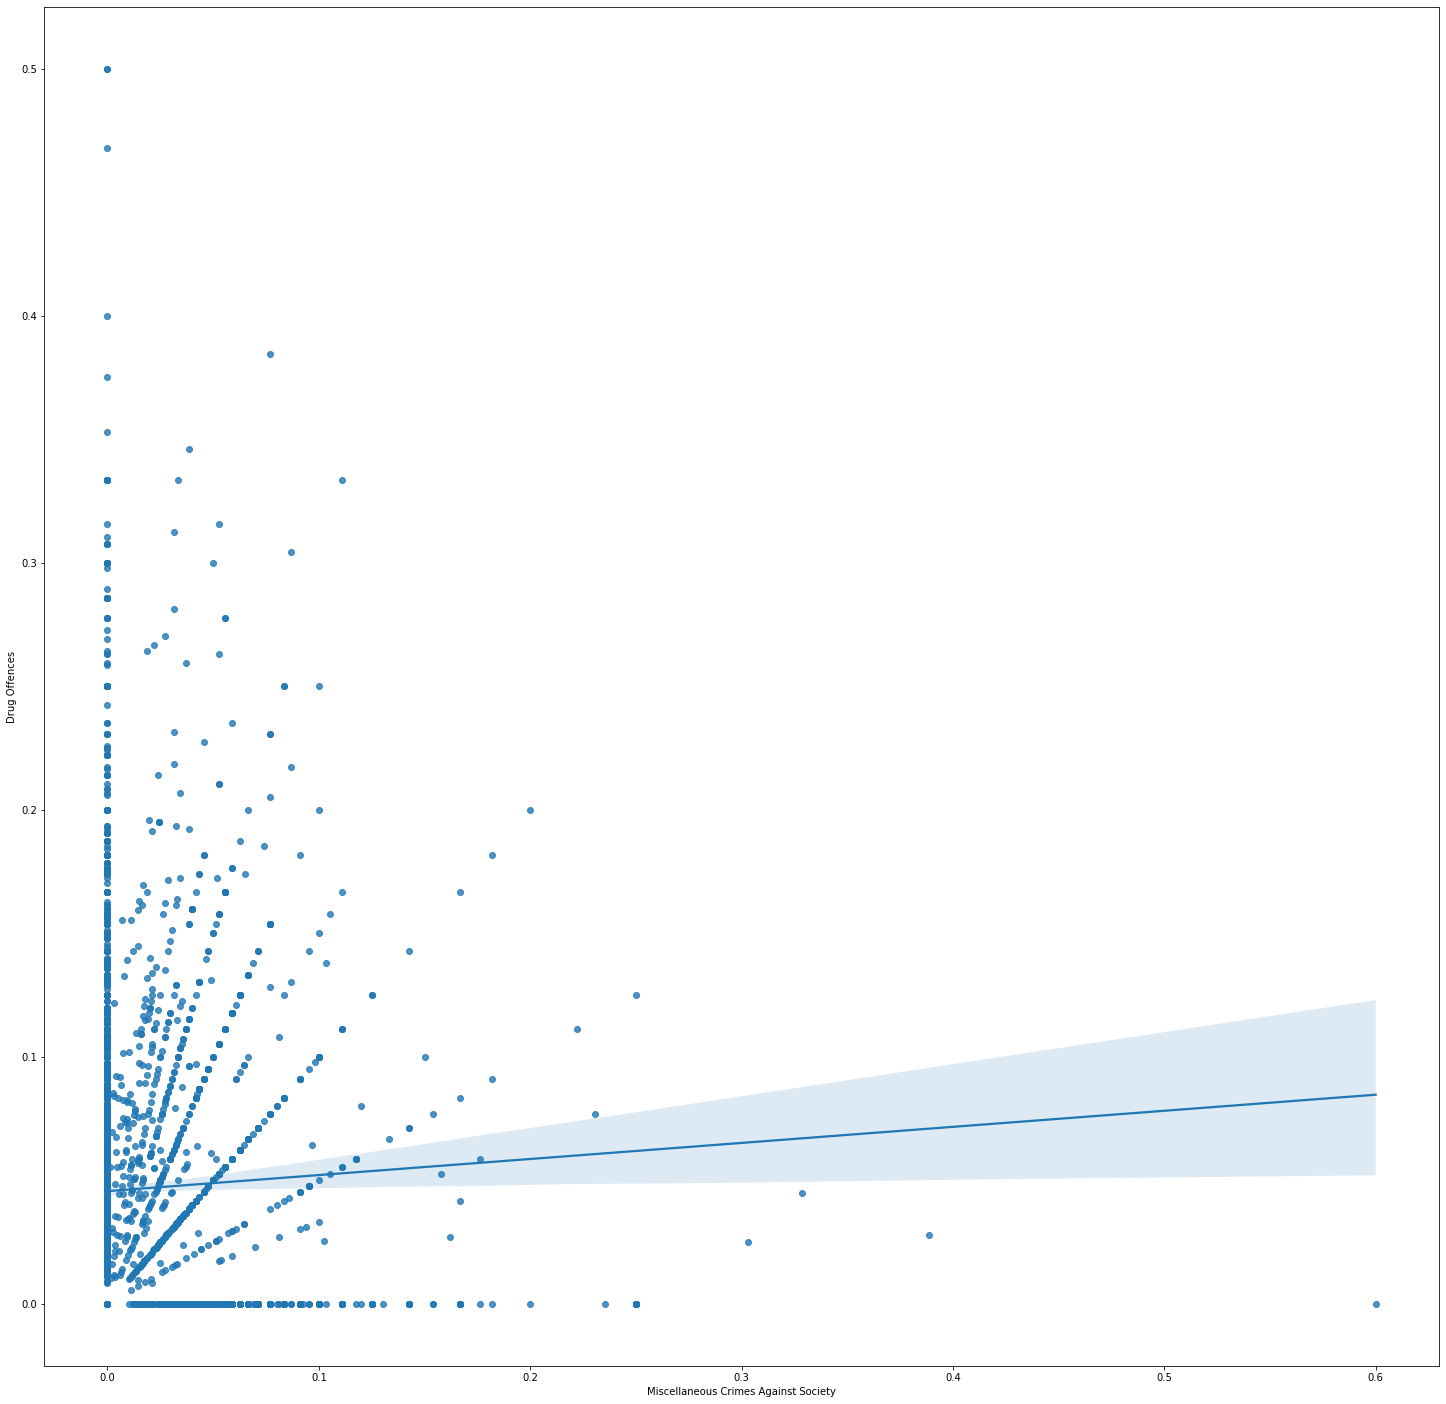

In [8]:
import seaborn as sns
sns.regplot(y=df["Drug Offences"],x=df["Miscellaneous Crimes Against Society"])